**INTRODUCTION: RESEARCH INTO SOFR AND IT’S RELATIONSHIP TO
MACRO-ECONOMIC FIGURES FOR TRADING ARBITRAGE**

The economy in recent years has become one of the hottest topics. With troubling data coming from jobs reports to the current administration trying to force the federal reserve to cut interest rates, it is a very turbulent time indeed. While the economy has become more turbulent in recent years, the macro economic data continues to be misunderstood or not understood by most of the American populous. The turbulent times have also created a situation where rapid changes in economic data can quickly allow individuals to profit from a proper understanding of relationships between this data. I will analyze the past 7 years of macroeconomic data in order to verify or find relationships between some key macroeconomic indicators.

**Goal And Questions Left To Answer**

-Goal: Define relationship understanding between SOFR(Secured Overnight
Financing Rate) and other macroeconomic indicators

-Guiding Questions:
1. What macroeconomic statistics have the closest correlation to SOFR?
2. To what extent are
certain macroeconomic features correlated to one another?
3. How has the correlation
between different macroeconomic figures and SOFR changed in the recent turbulent times?

**Dataset Overview**

The dataset is titled *U.S. Economic Vital Signs: 25 Years of Macro Data*. The dataset is publicly available through Kaggle and was posted by Eswaran Muthu. Datset Link: [Link](https://www.kaggle.com/datasets/eswaranmuthu/u-s-economic-vital-signs-25-years-of-macro-data)

The dataset contains 1889 rows of data for the 7 columns Date, M2 Money Supply, Fed Funds Rate, CPI, Inflation Rate and SOFR. While there are 7 columns, I will only look at Date, Fed Funds Rate, CPI, Inflation and SOFR as these are yield/percentage data, and CPI and M2 Money Supply are continiously growing float figures which would not assist in reaching my project goal or answering my guiding questions.

**Columns:**
1. *Fed Funds Rate*: A  important metric that is the interest rate set by the Federal
Reserve. This rate represents the overnight lending between banks (very similar to SOFR). The
Fed Funds Rate is important as when it is higher than borrowing it is more expensive, and it
slows economic growth and vice versa is true.
2. *SOFR*: SOFR is the benchmark for lending interest between financial institutions.
Higher SOFR indicated decreased liquidity or tighter macroeconomic policy. SOFR mainly affects consumers by increasing the base interest rate (higher SOFR means more expensive refinancing, mortgages etc)
3. *Inflation Rate*: Inflation rate is one of the most widely known macroeconomic indicators which measure the
percentage increase of average goods and services over time. This figure is important as high
inflation reduces purchasing power and low/negative inflation shows a possible recession.
4. *10Y Treasury Yield*: The recent macro-economic indicator that has gotten a lot of attention recently has been the
10-Year Treasury Rate. The 10-Year treasury rate is the return that investors can expect
through the ownership of government debt for 10 years.


**Accessing and Pre-Processing The Initial Data**

Below we access the dataset through kaggles built in import. We also print out the directory of where the file is located in order to access the csv file in later code cells. Kagglehub library is imported to gain access the data without downloading the actual csv and the OS library is a popular python library I imported in order to access the virtual directory.

In [31]:
import kagglehub

path = kagglehub.dataset_download("eswaranmuthu/u-s-economic-vital-signs-25-years-of-macro-data")

import os
print(os.listdir(path))

Using Colab cache for faster access to the 'u-s-economic-vital-signs-25-years-of-macro-data' dataset.
['macro_data_25yrs.csv']


In the code cell below, I imported pandas which is a popular python library for everything data manipulation. I stored the csv into a dataframe (variable df) and printed  out the first 5 rows to ensure the proper data is being accessed, and the first 5 columns were outputted so we can start getting a sense for how the data actually looks.

In [32]:
import pandas as pd
df = pd.read_csv(path + "/macro_data_25yrs.csv")
df.head()

,Date,M2_Money_Supply,10Y Treasury Yield,Fed Funds Rate,CPI,Inflation_Rate_%,SOFR
0,2018-04-03,13993.9,2.87,1.69,250.227,2.470996,1.83
1,2018-04-04,13993.9,2.87,1.69,250.227,2.470996,1.74
2,2018-04-05,13993.9,2.87,1.69,250.227,2.470996,1.75
3,2018-04-06,13993.9,2.87,1.69,250.227,2.470996,1.75
4,2018-04-09,13993.9,2.87,1.69,250.227,2.470996,1.75


In the below code cell, I printed out each columns count for NA or null values. It is important to output null values as it will appear as blank on visualizations or just not be compatible at all.

In [33]:
df.isna().sum()

,0
Date,0
M2_Money_Supply,0
10Y Treasury Yield,0
Fed Funds Rate,0
CPI,0
Inflation_Rate_%,0
SOFR,81


In the below code cell, we filled the null values for SOFR with the average or mean values to maintain a fair representation for the economic data while removing the headache of null values.

In [34]:
df['SOFR'] = df['SOFR'].fillna(df['SOFR'].mean())

Below we once again outputted the null count for each column to ensure SOFR no longer contains any null values.

In [35]:
df.isna().sum()

,0
Date,0
M2_Money_Supply,0
10Y Treasury Yield,0
Fed Funds Rate,0
CPI,0
Inflation_Rate_%,0
SOFR,0


Below we outputted the type of data that is held within each column to ensure we understand the type of data held within each column properly (unused macroeconomic figures like CPI will be removed in the next step)

In [36]:
df.dtypes

,0
Date,object
M2_Money_Supply,float64
10Y Treasury Yield,float64
Fed Funds Rate,float64
CPI,float64
Inflation_Rate_%,float64
SOFR,float64


In the below codecell, we removed CPI and M2 Money Supply as these are not helpful to our analysis of SOFR (a percentage of yield based values). M2 Money Supply and CPI are continiously growing values that don't compare well to percentage data.

In [37]:
df = df.drop(columns=['CPI'])
df = df.drop(columns=['M2_Money_Supply'])
df.head()

,Date,10Y Treasury Yield,Fed Funds Rate,Inflation_Rate_%,SOFR
0,2018-04-03,2.87,1.69,2.470996,1.83
1,2018-04-04,2.87,1.69,2.470996,1.74
2,2018-04-05,2.87,1.69,2.470996,1.75
3,2018-04-06,2.87,1.69,2.470996,1.75
4,2018-04-09,2.87,1.69,2.470996,1.75


**Visualization + Explanation**


Below we outputted a correlation heatmap that shows how correlated certain columns are to one another. The lighter and more closer to positive one the values are the more correlated they are and vice versa. From the initial heatmap it is clear tat the highest correlated values to SOFR are the Fed Funds Rate and 10Y Treasury Rate. While Inflation Rate is sllightly correlated on the negative side to SOFR. While these initial correlations are coefecients are important, we will later analyze how these patters/correlations change over times and pinpoint economic events and possible trades that would have benefitted from this analysis.

Reasoning For This Heatmap:

The reasoning behidn why I decided to place aa heatmap as a visual is that it gives a very quick summary of the correlations that these macroeconomic datapoints have to one another. There is both visual and numerical reinforcement to the viewer here that is easier to understand. I decided to make negative values much darker as most people associate positive with lighter colors and negative with darker colores.

<Axes: >

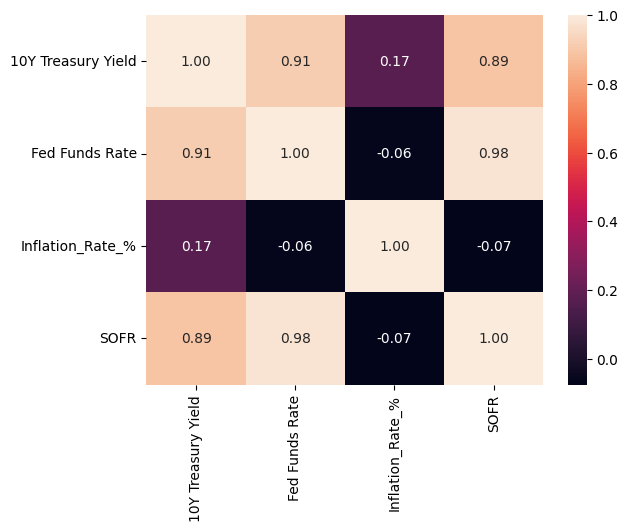

In [38]:
import seaborn as sns
dfWithoutDate = df.drop(columns=['Date'])
sns.heatmap(dfWithoutDate.corr(), annot=True, fmt='.2f')


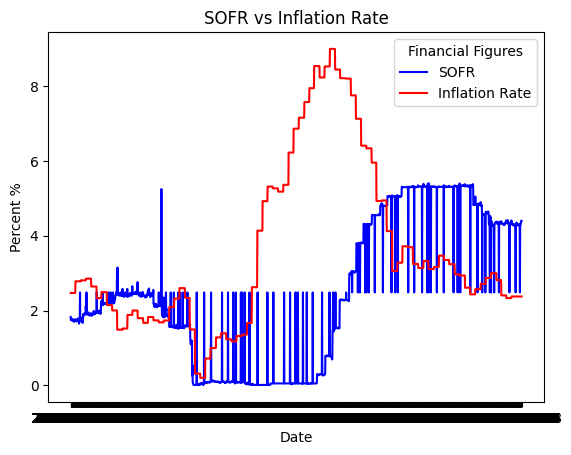

In [39]:
import matplotlib.pyplot as plt
sns.lineplot(data = df, x = 'Date', y = 'SOFR', color = 'Blue', label = 'SOFR')
sns.lineplot(data = df, x = 'Date', y = 'Inflation_Rate_%', color = 'red', label = 'Inflation Rate')
plt.title('SOFR vs Inflation Rate')
plt.legend(title='Financial Figures')
plt.ylabel('Percent %')
plt.show()

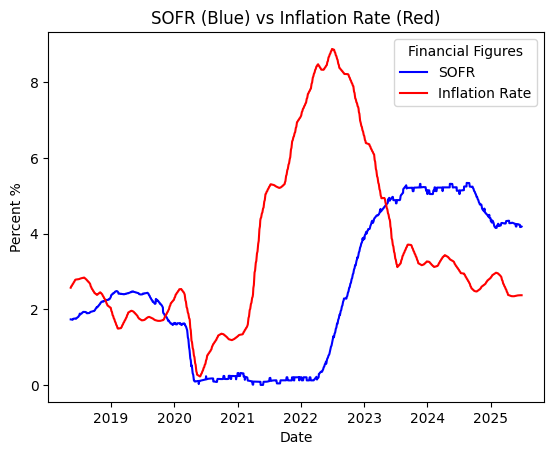

In [40]:
smoothDF = pd.DataFrame()
smoothDF['SOFR'] = df['SOFR'].rolling(30).mean()
smoothDF['Inflation Rate'] = df['Inflation_Rate_%'].rolling(30).mean()
smoothDF['Date'] = pd.to_datetime(df['Date'])
sns.lineplot(data = smoothDF, x = 'Date', y = 'SOFR', color = 'Blue', label = 'SOFR')
sns.lineplot(data = smoothDF, x = 'Date', y = 'Inflation Rate', color = 'red', label = 'Inflation Rate')
plt.legend(title='Financial Figures')
plt.ylabel('Percent %')
plt.title('SOFR (Blue) vs Inflation Rate (Red)')
plt.show()

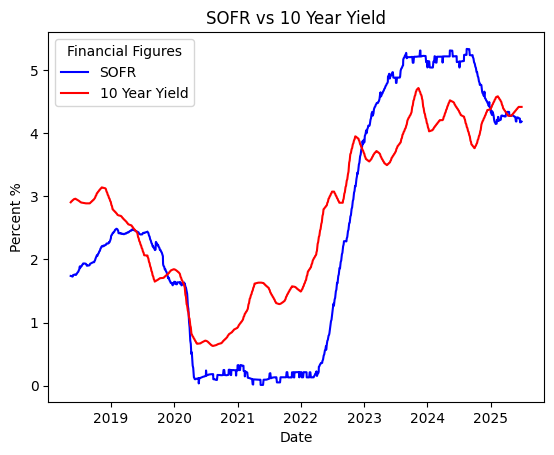

In [41]:
smoothDF['10 Year Yield'] = df['10Y Treasury Yield'].rolling(30).mean()
sns.lineplot(data = smoothDF, x = 'Date', y = 'SOFR', color = 'Blue', label = 'SOFR')
sns.lineplot(data = smoothDF, x = 'Date', y = '10 Year Yield', color = 'red', label = '10 Year Yield')
plt.legend(title='Financial Figures')
plt.ylabel('Percent %')
plt.title('SOFR vs 10 Year Yield')
plt.show()

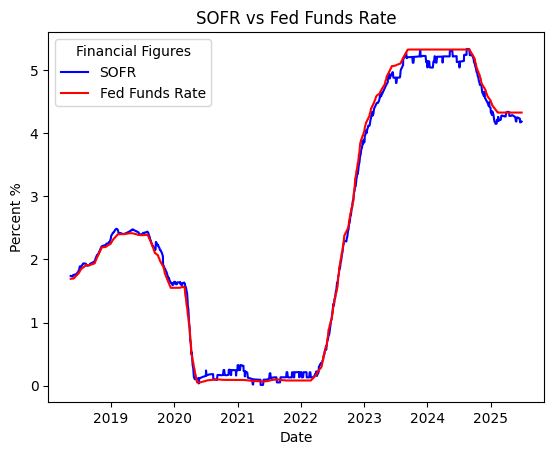

In [42]:
smoothDF['Fed Funds Rate'] = df['Fed Funds Rate'].rolling(30).mean()
sns.lineplot(data = smoothDF, x = 'Date', y = 'SOFR', color = 'Blue', label = 'SOFR')
sns.lineplot(data = smoothDF, x = 'Date', y = 'Fed Funds Rate', color = 'red', label = 'Fed Funds Rate')
plt.legend(title='Financial Figures')
plt.ylabel('Percent %')
plt.title('SOFR vs Fed Funds Rate')
plt.show()